# Binary classification based on Logistic Regression with a quadratic regularization
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
filename_train  = 'Assignment 09 train data.csv'
filename_test   = 'Assignment 09 test data.csv'

data_train  = np.genfromtxt(filename_train, delimiter=',')
data_test   = np.genfromtxt(filename_test, delimiter=',')

## define feature function

In [3]:
def feature_function(x, y):
    feature = []
    for i in range(len(x)):
        feature.append(np.array( [1, x[i], y[i], np.power(x[i], 2), np.power(y[i], 2), np.power(x[i], 3), np.power(y[i], 3)] ))
    feature = np.array(feature)    
        
    return feature

## define regression function based on the feature function

In [4]:
def regression_function(theta, feature):
    value = np.dot(theta, feature)
    return value

## define regularization function on the model parameters

In [5]:
def regularization_function(theta):
    value = 0
    for i in range(theta.size):
        value += np.power(theta[i], 2)
    return value

## define sigmoid function

In [6]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (add a small number inside logarithm function in order to avoid $\log( 0 )$)

In [7]:
def compute_loss_feature(theta, feature, label, alpha):
    loss = 0
    n = label.size
    eps = np.finfo(float).eps
    
    for i in range(n):
        regvalue = regression_function(theta, feature[i, :])
        sigvalue = logistic_function(regvalue)
        loss += (-label[i] * np.log(sigvalue+eps) - (1-label[i]) * np.log(1-sigvalue+eps)) / n
    
    loss += (alpha / 2) * regularization_function(theta)
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [8]:
def compute_gradient_feature(theta, feature, label, alpha):
    gradient = 0
    n = label.size
    
    for i in range(n):
        regvalue = regression_function(theta, feature[i, :])
        sigvalue = logistic_function(regvalue)
        gradient += ((sigvalue - label[i]) * feature[i, :]) / n 
        
    gradient += alpha * theta
    return gradient

## compute the accuracy

In [9]:
def compute_accuracy(theta, feature, label):
    predict = 0
    n = label.size
    
    for i in range(n):
        regvalue = regression_function(theta, feature[i, :])
        sigvalue = logistic_function(regvalue)
        
        if sigvalue >= 0.5 and label[i] == 1:
            predict += 1
        elif sigvalue < 0.5 and label[i] == 0:
            predict += 1
            
    accuracy = predict / n
    return accuracy

## gradient descent for the model parameters $\theta$

In [10]:
num_iteration   = 30000
learning_rate   = 0.3
alpha           = 0.000001
theta           = np.array((0, 0, 0, 0, 0, 0, 0))

feature_train = feature_function(data_train[:, 0], data_train[:, 1])
feature_test = feature_function(data_test[:, 0], data_test[:, 1])
label_train = data_train[:, 2]
label_test = data_test[:, 2]

In [11]:
theta_iteration             = np.zeros((num_iteration, theta.size))

loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [12]:
# train 데이터에서 theta, loss, accurcy 계산
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_train, label_train, alpha)
    loss = compute_loss_feature(theta, feature_train, label_train, alpha)
    accuracy = compute_accuracy(theta, feature_train, label_train)
    
    theta_iteration[i] = theta.reshape(1, theta.size)
    loss_iteration_train[i] = loss
    accuracy_iteration_train[i] = accuracy

In [13]:
# test 데이터에서 loss, accuracy 계산
for i in range(num_iteration):
    theta = theta_iteration[i]
    loss = compute_loss_feature(theta, feature_test, label_test, alpha)
    accuracy = compute_accuracy(theta, feature_test, label_test)
    
    loss_iteration_test[i] = loss
    accuracy_iteration_test[i] = accuracy

## compute accuracy of the classifiers

In [14]:
theta_optimal = theta_iteration[num_iteration-1]

accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)

## plot the results

In [15]:
def plot_data(data_train, data_test):
    fig = plt.figure(figsize=(16,8))   
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    for i in range(len(data_train)):
        if data_train[i, 2] == 0:
            ax1.plot(data_train[i, 0], data_train[i, 1], '.', color='blue')
        elif data_train[i, 2] == 1:
            ax1.plot(data_train[i, 0], data_train[i, 1], '.', color='red')
            
    for i in range(len(data_test)):
        if data_test[i, 2] == 0:
            ax2.plot(data_test[i, 0], data_test[i, 1], '.', color='blue')
        elif data_train[i, 2] == 1:
            ax2.plot(data_test[i, 0], data_test[i, 1], '.', color='red')
            
    plt.tight_layout()
    plt.show()
    
    
    
def plot_model_parameter(theta_iteration):
    plt.figure(figsize=(8,6))   
    plt.title('model parameter')
    plt.xlabel('iteration')
    
    n = theta_iteration.shape[1]
    for i in range(n):
        plt.plot(theta_iteration[:, i], '-', label=r"$\theta_{}$".format(i))
        
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_loss_curve(loss_iteration_train, loss_iteration_test):
    plt.figure(figsize=(8,6))
    plt.title('loss')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.plot(loss_iteration_train, '-', color='red', label="train")
    plt.plot(loss_iteration_test, '-', color='blue', label="test")
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):
    plt.figure(figsize=(8,6))   
    plt.title('accuracy')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    
    plt.plot(accuracy_iteration_train, '-', color='red', label="train")
    plt.plot(accuracy_iteration_test, '-', color='blue', label="test")
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_classifier(data, theta):
    plt.figure(figsize=(8,8)) 
    plt.title('data classifier')
    
    grid_x = np.arange(-1.5, 3, 0.01)
    grid_y = np.arange(-1, 2, 0.01)
    XX, YY = np.meshgrid(grid_x, grid_y)
    
    feature = feature_function(XX, YY)
    ZZ = []
    for i in range(len(XX)):
        ZZ.append( regression_function(theta, feature[i, :]) )
    ZZ = np.array(ZZ)
    
    # 데이터 포인트
    for i in range(len(data)):
        if data[i, 2] == 0:
            plt.plot(data[i, 0], data[i, 1], '.', color='blue')
        elif data[i, 2] == 1:
            plt.plot(data[i, 0], data[i, 1], '.', color='red')
            
    # 배경
    plt.scatter(XX, YY, c=ZZ, cmap='coolwarm')
    plt.colorbar()
    
    # 검은 선
    plt.contour(XX, YY, ZZ, levels=[0], colors='black')
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Results
<hr>

## 01. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

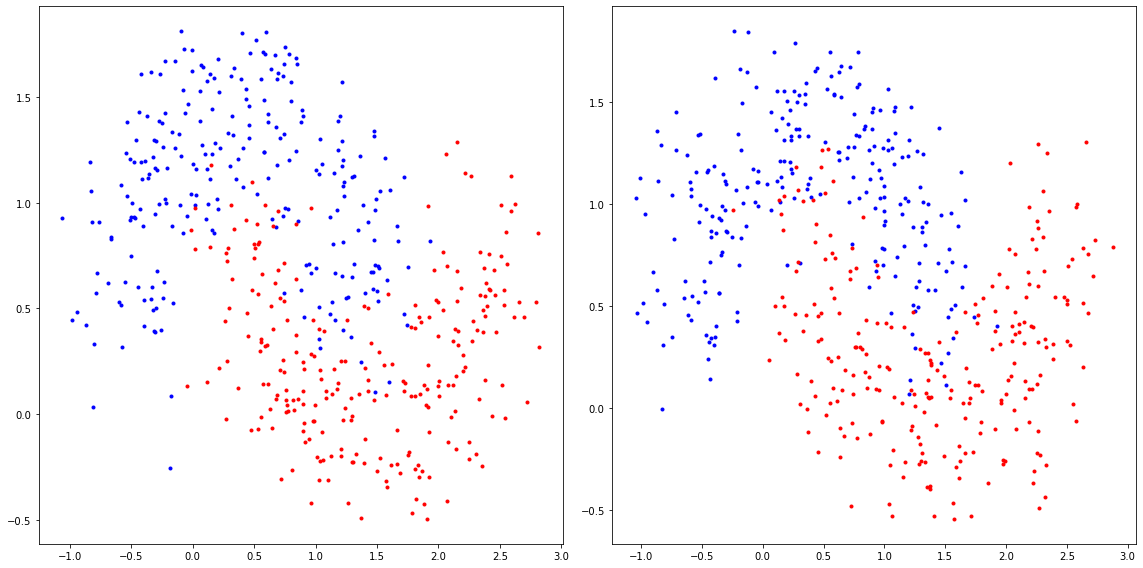

In [16]:
plot_data(data_train, data_test)

## 02. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

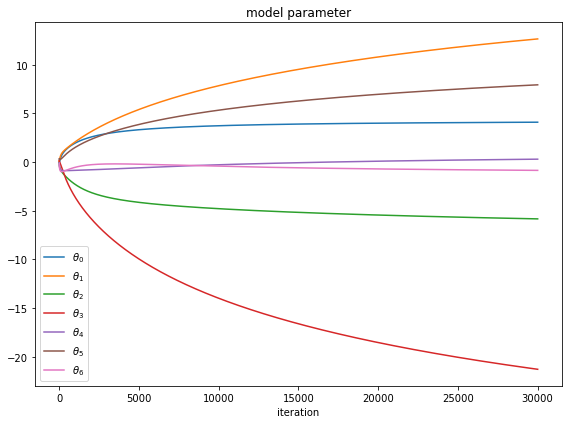

In [17]:
plot_model_parameter(theta_iteration)

## 03. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

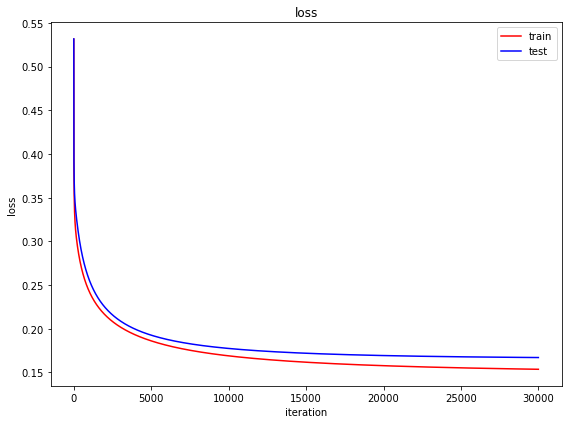

In [18]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

## 04. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

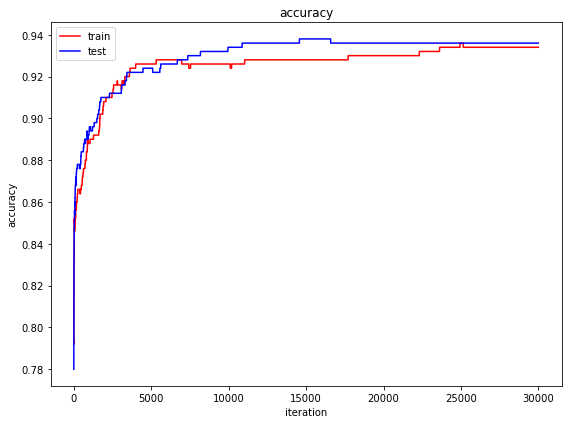

In [19]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

## 05. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

<ipython-input-3-51d3581066c6>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature.append(np.array( [1, x[i], y[i], np.power(x[i], 2), np.power(y[i], 2), np.power(x[i], 3), np.power(y[i], 3)] ))


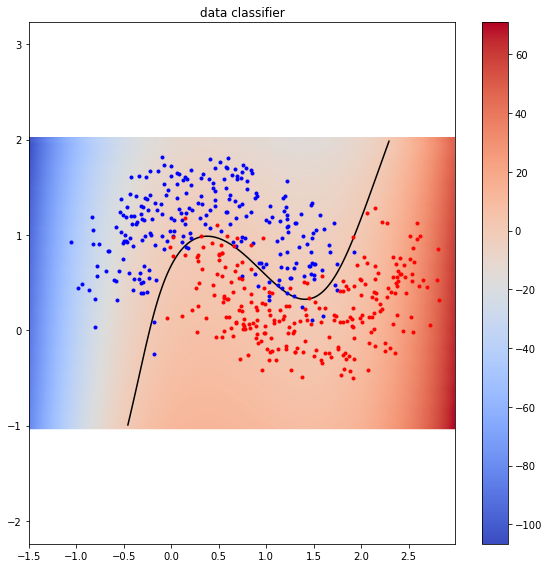

In [20]:
plot_classifier(data_train, theta_optimal)

## 06. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

<ipython-input-3-51d3581066c6>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature.append(np.array( [1, x[i], y[i], np.power(x[i], 2), np.power(y[i], 2), np.power(x[i], 3), np.power(y[i], 3)] ))


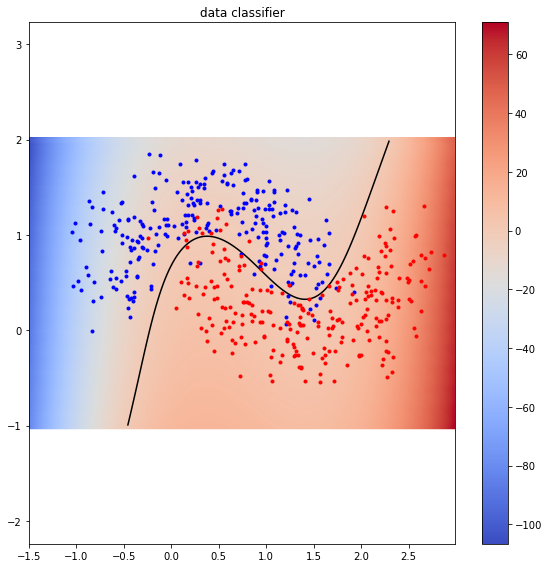

In [21]:
plot_classifier(data_test, theta_optimal)

## 07. print out the final training accuracy and the final testing accuracy in number with 5 decimal places

In [22]:
print('accuract(train): {:.5f}'.format(accuracy_train))
print('accuracy(test) : {:.5f}'.format(accuracy_test))

accuract(train): 0.93400
accuracy(test) : 0.93600
